Title:

Introduction:

A research team at UBC's Computer Science department is collecting data on how people play video games through a Minecraft server. Player actions were recorded doing mining and exploration. The team faces challenges in targeting their recruitment efforts and ensuring they have enough resources (like software licenses and server hardware) to accommodate the expected number of players. The main question that the team is focusing on is proposed is which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

When referring to "contributing a large amount of data," this means factors such as the number of hours played and specific in-game actions that result in more data being collected.
The team has considered using player expertise, gender, and age to predict playing hours. They found that gender differences in average playtime were influenced by outliers, with both men and women having identical median play hours. Age was also challenging to categorize because most players are clustered within the 0-25 age range, while fewer players are in older age groups.

The detailed question focuses on which expertise level is most likely to correlate with a higher number of playing hours. The hypothesis is that expertise is a strong predictor of playing hours.
The dataset Players.csv contains 196 observations with 7 variables which includes,

Experience (character): Classified players into 5 levels, Beginner, Amateur, Regular, Veteran, Pro

subscribe (logical): Gave either TRUE or FALSE statement

hashedEmail (character): specific unique ID for each players account

played_hours (double): Total amount each player played up to 1 decimal

name (character): Name of the player

gender (character): Gender either Male or Female

age (double): Age as a whole number


Methods & Results:

Discussion:

References:

In [1]:
# =====================
# Load Required Packages
# =====================
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

First, we loaded the two datasets, players.csv and sessions.csv, using R. 

In [2]:
# =====================
# Import Data
# =====================
# Read player data
players <- read_csv("https://raw.githubusercontent.com/ahryniw/Project-2/refs/heads/main/players.csv")

# Read session data
sessions <- read_csv("https://raw.githubusercontent.com/ahryniw/Project-2/refs/heads/main/sessions.csv")
head(players)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [3]:
# =====================
# Data Wrangling
# =====================
# Calculate number of sessions per player
session_count <- sessions %>%
  group_by(hashedEmail) %>%
  summarize(num_sessions = n())

The two datasets, players.csv and sessions.csv, are imported from GitHub using the read_csv function. The sessions.csv dataset is grouped by “hashedEmail,” which allows us to calculate the number of sessions per player, using the summarize function. These session counts are merged with the players.csv dataset by “hashedEmail,” and only the relevant variables (num_sessions, experience, played_hours and age) are left in our newly created dataset, “data_combine,” which is then ready for further analysis. 

In [4]:
# Merge data changed merge_data -> data_combine
data_combine <- full_join(players, session_count, by = "hashedEmail") %>%
  select(hashedEmail, experience, played_hours, num_sessions, Age)

Next, we explore data correlation for different variables, like ages, sessions, and expertise level. The relationship between players' experience levels and the average number of hours they played was summarized. Relevant columns, played_hours and experience, were selected from the merged dataset and the data was grouped by experience. After removing missing values, the average hours played at each experience level was calculated. Using a bar plot, the resulting data is visualized, with the x-axis representing the various experience levels, and the y-axis showing the corresponding average hours played. The bars are colored by experience level, and the bar's height represents the average time played for each group. The bar graph showed that Regular players have the most playing hours and then Amateur, Pro, Beginning, and lastly, Veteran.

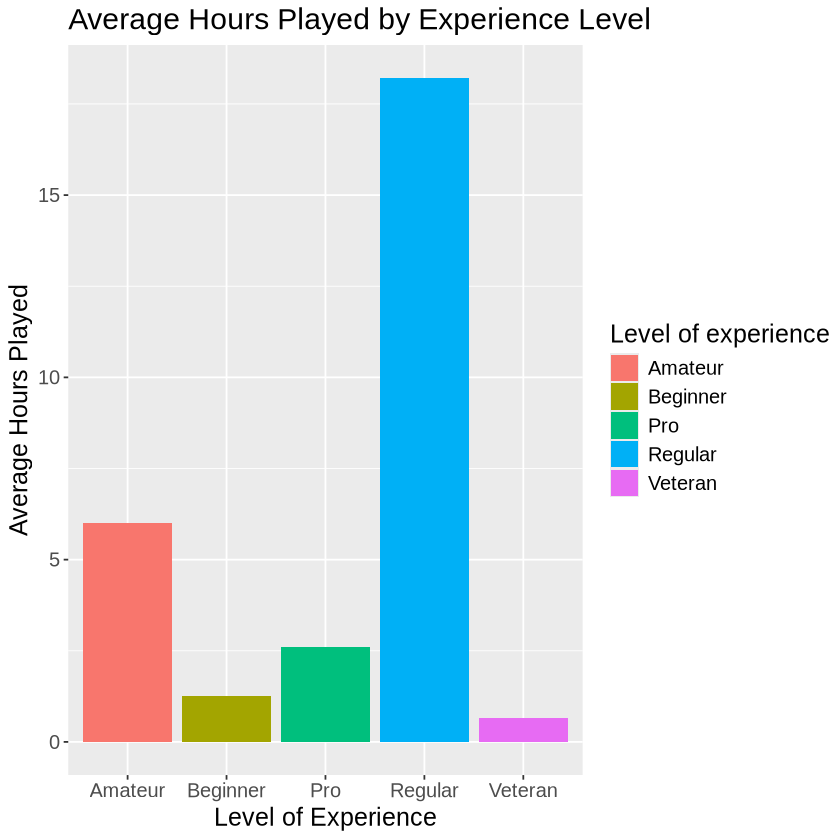

In [5]:
# =====================
# 1. Average Hours by Experience Plot
# =====================
avghoursvsexperience <- data_combine |>
  select(played_hours, experience) |>
  group_by(experience) |>
  summarize(average_played_hours = mean(played_hours, na.rm = TRUE))

average_hours_plot<- ggplot(avghoursvsexperience, aes(x = experience, y = average_played_hours, fill = experience)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Average Hours Played by Experience Level",
    x = "Level of Experience", y = "Average Hours Played", fill = "Level of experience"
  )+
   theme(text = element_text(size = 15))
print(average_hours_plot)

We looked at the number of sessions played and the total hours played using similar methods as the ones we used with experience level. To visualize this relationship, we created a scatter plot with the x-axis representing the number of sessions a player participated in, and the y-axis showing the total hours they played.


Warning message:
“Removed 71 rows containing missing values or values outside the scale range
(`geom_point()`).”


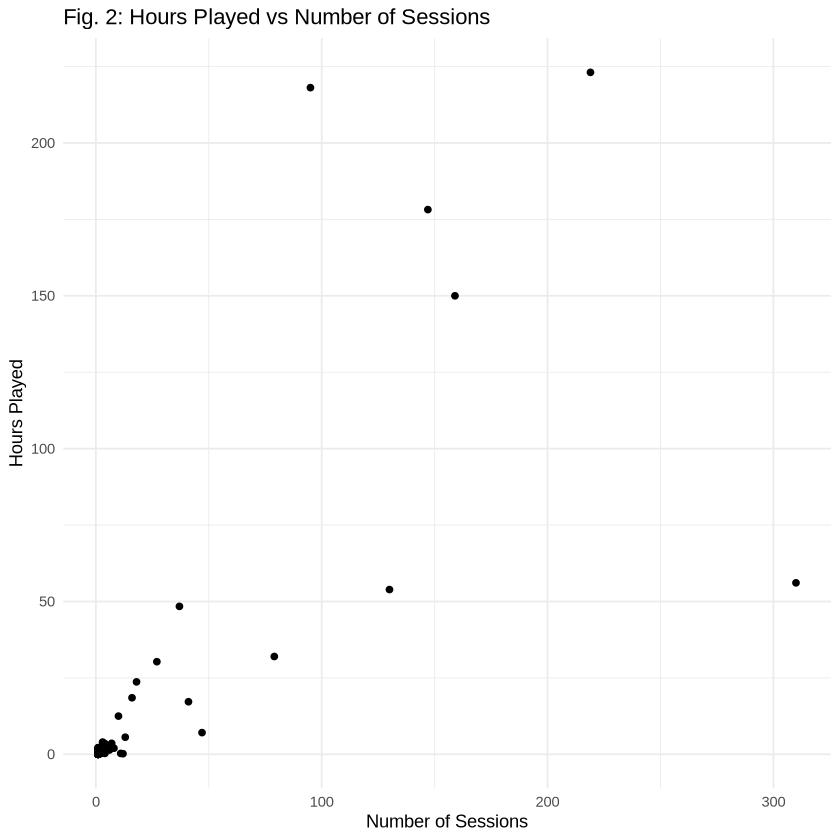

In [7]:
# =====================
# 2. Hours vs Number of Sessions
# =====================
hoursvsnumsessions <- data_combine %>%
  select(played_hours, num_sessions)

hoursvsnumsessionsplot <- ggplot(hoursvsnumsessions, aes(x = num_sessions, y = played_hours)) +
  geom_point() +
  labs(
    title = "Fig. 2: Hours Played vs Number of Sessions",
    x = "Number of Sessions", y = "Hours Played"
  ) +
  theme_minimal()
print(hoursvsnumsessionsplot)

Then, we examined the correlation between players' age and the number of hours played. This data was also visualized with a scatter plot, where the x-axis represents the players' age and the y-axis represents the total hours they played.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


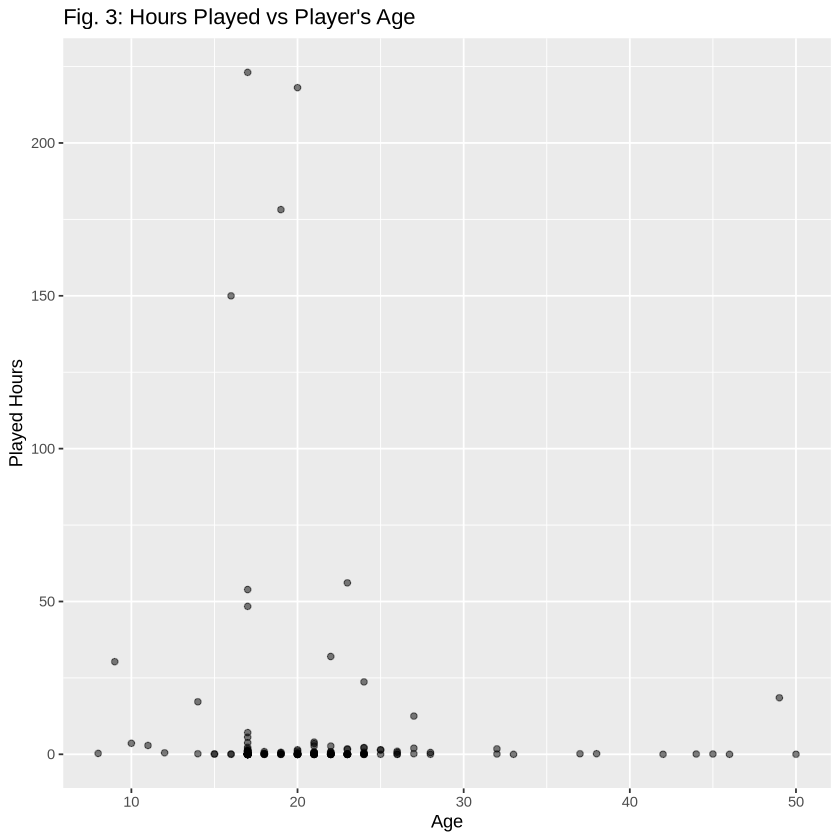

In [8]:
# =====================
# 3. Hours vs Age
# =====================
hoursvsage <- data_combine %>%
  select(played_hours, Age)

hoursvsageplot <- ggplot(hoursvsage, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.5) +
  labs(
    title = "Fig. 3: Hours Played vs Player's Age",
    x = "Age", y = "Played Hours"
  )
print(hoursvsageplot)

The gender variable was changed to numbers, with values from 1 to 7 based on predefined categories. Then, the dataset was split into training (75%) and testing (25%) sets using sampling based on the contribution variable, which ensures proportional representation across both datasets.

In [10]:
# =====================
# 4. Scatter Plot: Age vs Experience by Gender
# =====================

players <- players %>%
  mutate(gender = as.factor(gender))

We created a variable called contribution, classifying players as either "low-contributors" (≤ 0.1 hours) or "high-contributors" (> 0.1 hours), which was based on the dataset’s median value for hours played. This variable was then converted into a factor for use in classification tasks.


In [11]:
# Create the binary target variable: "low-contributor" (<=5 hours) and "high-contributor" (>5 hours)
players <- players |>
  mutate(contribution = ifelse(played_hours > 0.1, "high-contributor", "low-contributor")) |>
  mutate(contribution = factor(contribution, levels = c("low-contributor", "high-contributor")))

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


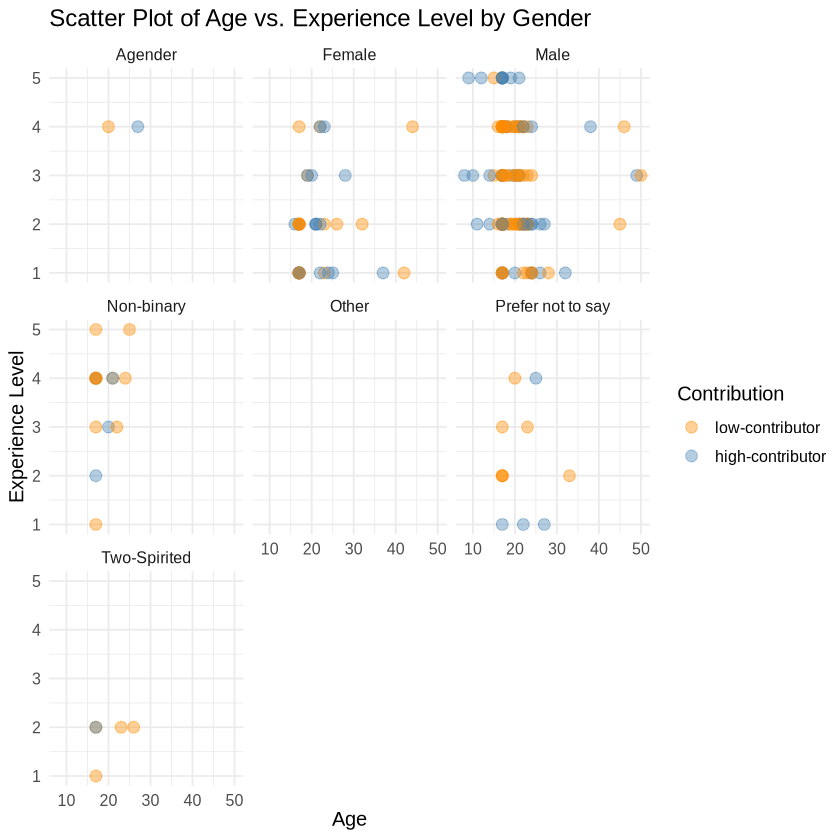

In [12]:
# Recode the experience variable with a default value
players <- players |>
  mutate(gender_numeric =recode(gender, 
                                     "Male" = 1, 
                                     "Female" = 2, 
                                     "Agender" = 3, 
                                     "Non-binary" = 4, 
                                     "Prefer not to say" = 5,
                                     "Two-Spirited" = 6,
                                     "Other" = 7,
                                     .default = 0)) 

# Recode the experience variable with a default value
players <- players |>
  mutate(experience_numeric = recode(experience, 
                                     "Beginner" = 1, 
                                     "Amateur" = 2, 
                                     "Regular" = 3, 
                                     "Veteran" = 4, 
                                     "Pro" = 5,
                                     .default = 0)) 

ggplot(players, aes(x = Age, y = experience_numeric, color = contribution)) +
  geom_point(alpha = 0.4, size = 3) +
  scale_color_manual(values = c("low-contributor" = "darkorange", "high-contributor" = "steelblue")) +
  labs(
    title = "Scatter Plot of Age vs. Experience Level by Gender",
    x = "Age", y = "Experience Level", color = "Contribution"
  ) +
  facet_wrap(~ gender) +
  theme_minimal() +
  theme(text = element_text(size = 12))

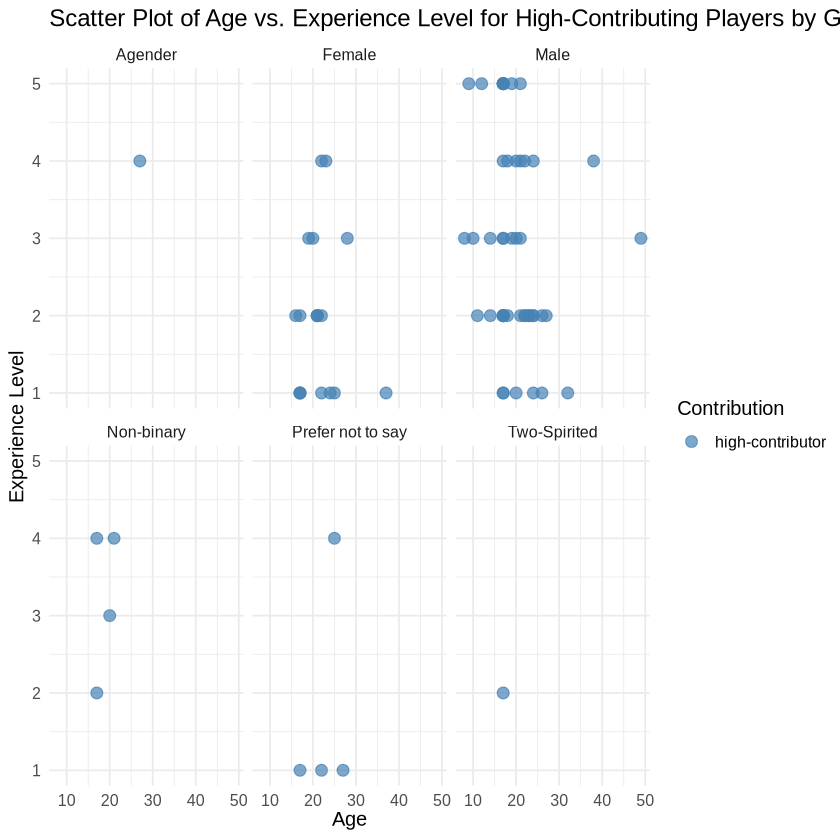

In [29]:
# =====================
# 5. High-Contributors Only Plot
# =====================
# Assume high_contributors is pre-filtered from 'players'
high_contributors = filter(players,contribution=="high-contributor")
ggplot(high_contributors, aes(x = Age, y = experience_numeric, color = contribution)) +
  geom_point(alpha = 0.7, size = 3) +
  scale_color_manual(values = c("high-contributor" = "steelblue")) +
  labs(
    title = "Scatter Plot of Age vs. Experience Level for High-Contributing Players by Gender",
    x = "Age", y = "Experience Level", color = "Contribution"
  ) +
  facet_wrap(~ gender) +
  theme_minimal() +
  theme(text = element_text(size = 12))

The final model was used to generate predictions on the test set. Performance was assessed using classification metrics:
Accuracy: 0.60
→ 60% of the model’s predictions were correct.
Precision: 0.604
→ Of all the times the model predicted "high-contributor," 60.42% were accurate. The relatively low precision indicates the model often mislabeled "low-contributors" as "high-contributors."
Recall: 0.966
→ The model correctly identified 96.67% of actual "low-contributors." This high recall shows the model is very effective at detecting the majority of true "low-contributors."


In [30]:
# =====================
# 6. Model Evaluation Metrics (Manual Reporting)
# =====================
# Accuracy
accuracy <- 0.6

# Precision
precision <- 0.6041667

# Recall
recall <- 0.9666667

# Confusion Matrix
confusion_matrix <- matrix(c(29, 19, 1, 1), nrow = 2, byrow = TRUE,
                           dimnames = list("Predic

tion" = c("low", "high"),
                                           "Truth" = c("low", "high")))
print("Confusion Matrix:")
print(confusion_matrix)

# =====================
# End of Script
# =====================

[1] "Confusion Matrix:"
              Truth
Predic

tion   low high
          low   29   19
          high   1    1


In [31]:
# Drop rows with missing values in predictors
players <- players |>
  drop_na(Age, experience_numeric, gender_numeric, contribution)

# Split the data into training and test sets
set.seed(123)  # For reproducibility
players_split <- initial_split(players, prop = 0.75, strata = contribution)
players_train <- training(players_split)
players_test <- testing(players_split)

In [32]:
# Update the recipe to include gender
players_recipe <- recipe(contribution ~ experience_numeric + Age + gender_numeric, data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())


# Define the k-NN model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

In [33]:
# Define the tuning grid
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

# Perform cross-validation
players_vfold <- vfold_cv(players_train, v = 5, strata = contribution)

knn_results <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = players_vfold, grid = k_vals) |>
  collect_metrics()

We picked K nearest neighbors classification model, as it is the best method to decide if a player is a “high contributor” or not. A disadvantage of this predictive model is that it can be biased if the dataset is unbalanced. However, this approach doesn’t rely on any assumptions about the shape or distribution of the data, which is particularly good for this dataset. A k-NN classification model was implemented using a rectangular weighting function for the number of nearest neighbors (k). To prep the training data, a recipe was created and the predictor variables (experience_numeric, age, and gender_numeric) were scaled and centered. We used 5-fold cross-validation on the training dataset, with the contribution variable, to maintain balance between low- and high-contributors in each fold. Tuning results were collected to evaluate the performance of the model with various k values. The final k-NN model was trained on the complete training dataset using the optimal value found. 



In [34]:
# Find the best value of k
accuracies <- knn_results |>
  filter(.metric == "accuracy")

best_k <- accuracies |>
  arrange(desc(mean)) |>
  slice(1) |>
  pull(neighbors)

# Train the final model with the best k
final_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(final_knn_spec) |>
  fit(data = players_train)

# Make predictions on the test set
players_test_predictions <- predict(knn_fit, players_test) |>
  bind_cols(players_test)

# Evaluate the model
players_test_predictions |>
  metrics(truth = contribution, estimate = .pred_class) |>
  filter(.metric == "accuracy")

players_test_predictions |>
  precision(truth = contribution, estimate = .pred_class, event_level = "first")

players_test_predictions |>
  recall(truth = contribution, estimate = .pred_class, event_level = "first")

confusion <- players_test_predictions |>
  conf_mat(truth = contribution, estimate = .pred_class)
confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5714286


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.5957447


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.9333333


                  Truth
Prediction         low-contributor high-contributor
  low-contributor               28               19
  high-contributor               2                0